In [1]:
from glob import glob
import scipy.io.wavfile as wavfile
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.fftpack import fft
import pandas as pd

In [14]:
def plot(n: int):
    min_indice = 100
    indices = spectral_densities[n] > min_indice
    print(indices)
    clean_sd = spectral_densities[n] * indices
    f_hat = indices * f_hats[n]
    f_filtered = np.fft.irfft(f_hat)

    plt.plot(frequencies[n], clean_sd)
    plt.title('Spectral Density')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Spectral Density')
    plt.show()


In [3]:
# pegar arquivos
notes = pd.read_csv('notas.csv')
sound_files = glob(r'./Violão/*.wav')
frequency = 16_000
period = 1 / frequency

# Dados dos soms
sound_data = [
    wavfile.read(s)[1]
    for s in sound_files
]
audio_lengths = [
    len(d) / frequency
    for d in sound_data
]
time_intervals = [
    np.arange(0, a, period)
    for a in audio_lengths
]
frequencies = [
    np.fft.fftfreq(len(d), period)
    for d in sound_data
]

In [4]:
# Transformada Rápida de Fourier
f_hats = [fft(d) for d in sound_data]
spectral_densities = [abs(fh) for fh in f_hats]

[ True  True  True ...  True  True  True]


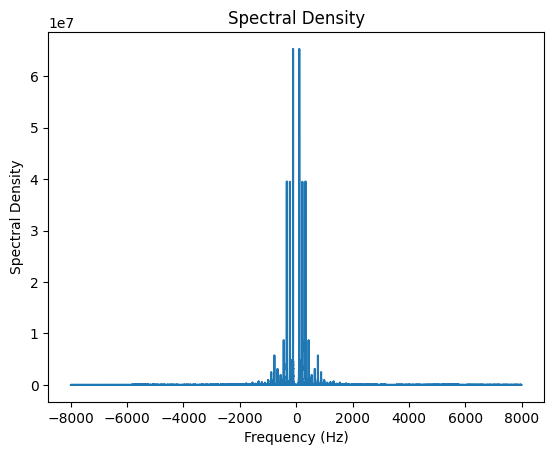

In [15]:
# Plotagem
plot(n=4)